In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import pearsonr

In [14]:
book = pd.read_csv('data/tiki.csv',encoding='utf-8')
book.category = book.category.str.replace('Nhà Sách Tiki/', '')
book.category = book.category.str.replace('Sách tiếng Việt/', '')
book.category = book.category.str.replace('English Books/', '')
book.category = book.category.apply(lambda x: x.split('/')[0])
book.rename(columns = {'title-best-seller':'language'}, inplace = True)
book.language.replace('Sách tiếng Việt bán chạy', 'Vietnamese', inplace= True)
book.language.replace('English Books bán chạy', 'English', inplace= True)
book.drop(['id', 'href'],1,  inplace=True)
book.review_count  = book.review_count.apply(lambda x: x[1:].split(' ')[0] if not isinstance(x, float) else 0).astype(int)
book.describe(include='all')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_23868/2728301725.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  book.drop(['id', 'href'],1,  inplace=True)


,language,category,year,order,name,price,author,rating,review_count
count,2000,2000,2000.000,2000.000000,2000,2.000000e+03,1814,1737.000000,2000.000000
unique,2,36,NaN,NaN,1244,NaN,531,NaN,NaN
top,Vietnamese,Sách văn học,NaN,NaN,Oxford Learner's Pocket Dictionary : A Pocket-...,NaN,J. K. Rowling,NaN,NaN
freq,1000,555,NaN,NaN,11,NaN,62,NaN,NaN
mean,NaN,NaN,2015.500,50.500000,NaN,1.565968e+05,NaN,4.537651,379.297500
std,NaN,NaN,2.873,28.873289,NaN,2.102258e+05,NaN,0.393977,873.255119
min,NaN,NaN,2011.000,1.000000,NaN,4.000000e+03,NaN,1.000000,0.000000
25%,NaN,NaN,2013.000,25.750000,NaN,6.900000e+04,NaN,4.450000,6.000000
50%,NaN,NaN,2015.500,50.500000,NaN,9.900000e+04,NaN,4.600000,69.500000
75%,NaN,NaN,2018.000,75.250000,NaN,1.840000e+05,NaN,4.800000,303.250000


Category Translation


In [15]:
book.price = round(book.price/23030, 2)
book.category = book.category.replace({'Sách thiếu nhi ': 'Children\'s Books',
                                             'Sách văn học': 'Literature & Fiction', 
                                             'Fiction - Literature':'Literature & Fiction', 
                                             'Sách kinh tế': 'Business & Money', 
                                             'Business & Economics':'Business & Money', 
                                             'Tạp Chí - Catalogue':'Magazine', 
                                             'Sách kỹ năng sống':'Self-Help', 
                                             'How-to - Self Help': 'Self-Help', 
                                             'Sách Văn Hóa - Địa Lý - Du Lịch':'Travel', 
                                             'Travel & Holiday':'Travel', 
                                             'Truyện Tranh, Manga, Comic':'Comics & Graphic Novels',  
                                             'Sách Tham Khảo': 'Reference',
                                             'Sách Học Ngoại Ngữ':'Language',
                                             'Sách Tôn Giáo - Tâm Linh': 'Religion & Spirituality',
                                             'Sách Bà mẹ - Em bé':'Parenting',
                                             'Sách Y Học': 'Medical Books',
                                             'Sách Kiến Thức Tổng Hợp': 'General Knowlegde',
                                             'Thể Dục - Thể Thao':'Sports & Outdoors',
                                             'Sách Thường Thức - Gia Đình':'Health, Fitness & Dieting',
                                             'Sách Lịch sử':'History',
                                             'Sách Khoa Học - Kỹ Thuật':'Science & Math',
                                             'Điện Ảnh - Nhạc - Họa':'Arts & Photography',
                                             'Sách Tâm lý - Giới tính':'Psychology & Relationships',
                                             'Education - Teaching': 'Education & Teaching',                              
                                             'Travel & Holiday':'Travel',
                                             'Science - Technology':'Science & Math',
                                             'Art & Photography':'Arts & Photography'
                                             })
tiki = book
tiki['source'] = 'Tiki'
tiki

,language,category,year,order,name,price,author,rating,review_count,source
0,Vietnamese,Self-Help,2020,76,Combo Bạn Đắt Giá Bao Nhiêu + Khí Chất Bao Nhi...,8.99,Vãn Tình,4.95,1406,Tiki
1,Vietnamese,Self-Help,2020,77,Thiết Kế Cuộc Đời Thịnh Vượng - Design a Prosp...,12.98,Thái Phạm,4.95,2552,Tiki
2,Vietnamese,Comics & Graphic Novels,2020,78,Thám Tử Lừng Danh Conan Tập 97,0.87,Gosho Aoyama,4.95,1318,Tiki
3,Vietnamese,Self-Help,2020,79,Combo Cà Phê Cùng Tony và Trên Đường Băng,5.67,Tony Buổi Sáng,4.80,1947,Tiki
4,Vietnamese,Children's Books,2020,80,Full bộ Ehon Nhật Bản cho bé 0-6 tuổi thông mi...,11.34,Suzuki Mio,4.80,1236,Tiki
...,...,...,...,...,...,...,...,...,...,...
1995,English,Self-Help,2018,49,Outliers - The Story Of Success,8.46,Malcolm Gladwell,4.50,111,Tiki
1996,English,Children's Books,2018,73,The Nutcracker Book And Puzzle Pack,2.30,NaN,4.95,8,Tiki
1997,English,Literature & Fiction,2018,74,Harry Potter Part 1: Harry Potter And The Sorc...,13.24,Dr. Devin Dennie,3.90,35,Tiki
1998,English,Literature & Fiction,2018,75,The Great Gatsby - Đại Gia Gatsby,11.43,F. Scott Fitzgerald,3.40,7,Tiki


In [16]:
amazon = pd.read_csv('data/amazon.csv')
amazon.dropna(subset = ['name'],inplace=True)
amazon['review'] = amazon['review'].fillna('0')
amazon.review = amazon.review.apply(lambda review: str(review).replace(',','')).astype(int)
amazon['rating'] = amazon['rating'].str.replace(' out of 5 stars', '').astype(float)
amazon['order'] = amazon['order'].str.replace('#','').astype(int)
amazon['price'] = amazon['price'].str.replace('$','').astype(float)
amazon['language']= 'English'
amazon.drop([ 'Unnamed: 0'],1, inplace=True)
amazon = amazon.rename(columns={'review': 'review_count'})
amazon['source'] = 'Amazon'
amazon["category"] = amazon['category'].apply(lambda x: str(x).split('/')[1] if len(str(x).split('/'))>1 else 'Unknown')
amazon.describe(include = 'all')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_23868/2095278029.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amazon['price'] = amazon['price'].str.replace('$','').astype(float)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_23868/2095278029.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  amazon.drop([ 'Unnamed: 0'],1, inplace=True)


,year,order,name,author,rating,review_count,type,price,category,language,source
count,2684.000000,2684.000000,2684,2682,2677.000000,2684.000000,2683,2683.000000,2684,2684,2684
unique,NaN,NaN,1673,1093,NaN,NaN,13,NaN,36,1,1
top,NaN,NaN,The Four Agreements: A Practical Guide to Pers...,J.K. Rowling,NaN,NaN,Hardcover,NaN,Literature & Fiction,English,Amazon
freq,NaN,NaN,17,29,NaN,NaN,1482,NaN,410,2684,2684
mean,2007.989940,50.340537,NaN,NaN,4.556705,11871.958271,NaN,13.333917,NaN,NaN,NaN
std,7.796392,28.819931,NaN,NaN,0.308216,18240.824437,NaN,12.125414,NaN,NaN,NaN
min,1995.000000,1.000000,NaN,NaN,1.000000,0.000000,NaN,0.010000,NaN,NaN,NaN
25%,2001.000000,25.000000,NaN,NaN,4.500000,856.750000,NaN,7.990000,NaN,NaN,NaN
50%,2008.000000,50.000000,NaN,NaN,4.600000,4555.000000,NaN,11.500000,NaN,NaN,NaN
75%,2015.000000,75.000000,NaN,NaN,4.700000,16067.000000,NaN,16.000000,NaN,NaN,NaN


In [17]:
final = pd.concat([tiki, amazon]).reset_index().drop('index',1)
final['from'] = final['source'] + ' ' +final['language']+ ' Books'

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_23868/2715673850.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final = pd.concat([tiki, amazon]).reset_index().drop('index',1)


In [8]:
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report
report = create_report(final)
report.show_browser()


ModuleNotFoundError: No module named 'dataprep'

1. Correlation

In [9]:
bluepink = sns.diverging_palette(245, 10,l=50, s=90, n= 15)
blue = sns.light_palette((10/255, 30/255, 111/255), 10, as_cmap=True)
red = sns.light_palette((220/255, 67/255, 88/255), 10, as_cmap=True)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_15784/1497822819.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('graph/correlation.png', type= 'png', dpi = 1200)


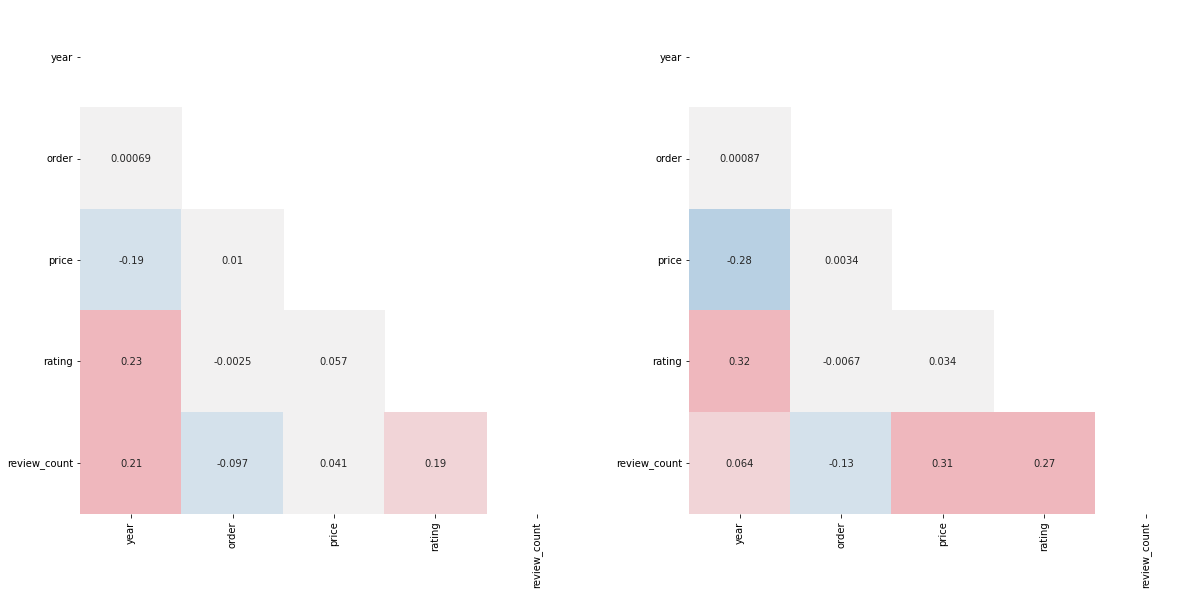

In [10]:
fig, [ax1, ax2] = plt.subplots(1,2) 
upper = np.triu(np.ones_like(final.corr()))
pearson = sns.heatmap(final.corr(method='pearson'), cmap = bluepink, mask = upper, annot=True, cbar = False, center = 0, vmin=-1, vmax=1, square = True, ax = ax1)
spearman = sns.heatmap(final.corr(method='spearman'), cmap = bluepink, mask = upper, annot=True, cbar = False, center = 0, vmax=1, vmin=-1, square = True, ax = ax2)
fig.set_size_inches((20,10))
plt.savefig('graph/correlation.png', type= 'png', dpi = 1200)


In [25]:
data = final.dropna()
# pearsonr(data['price'], data['year'])
pearsonr(final['review_count'], final['year'])



(0.2108944624332103, 3.060178374218423e-48)

<label>2. Clustering</label>

Decide cluster with hierarchical-clustering, hierarchical-clustering work with continuous data, and we can decide the number of clusters by our own

In [17]:
data = final.drop(['name','author','type','category','language', 'source','from'],axis = 1)
data['year'] = data['year'].astype('int32')
data = data.fillna(data.mean())

normalize data, fill None value by mean

In [18]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,year,order,price,rating,review_count
0,0.820358,0.030865,0.003651,0.002010,0.571002
1,0.620461,0.023651,0.003987,0.001520,0.783869
2,0.837056,0.032322,0.000361,0.002051,0.546158
3,0.719709,0.028147,0.002020,0.001710,0.693700
4,0.852492,0.033762,0.004786,0.002026,0.521624


import hierarchical-clustering method of scipy

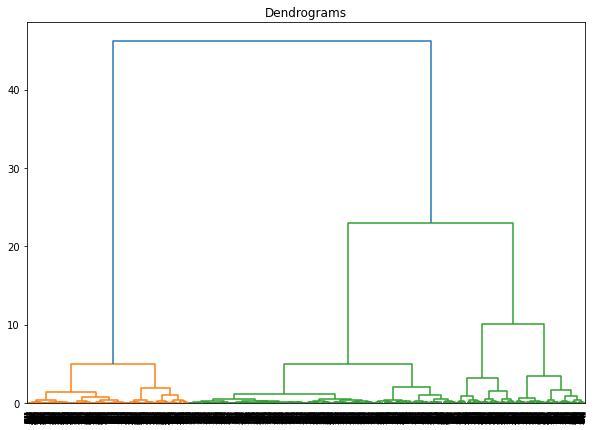

In [19]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

choosing threshold

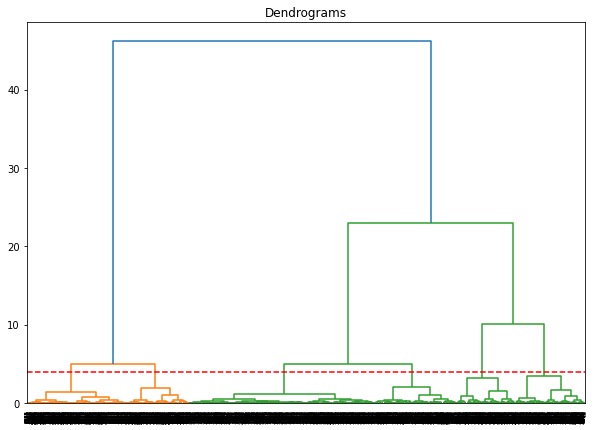

In [20]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

After choosing threshold we have the number of clusters is 5

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([2, 1, 2, ..., 0, 1, 0], dtype=int64)

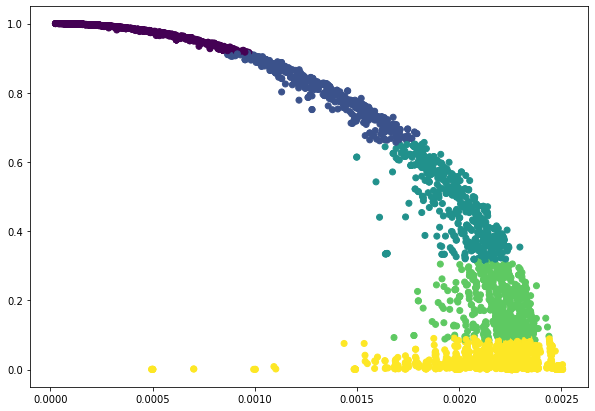

In [23]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['rating'],data_scaled['review_count'], c=cluster.labels_) 

2. Chi square

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(amazon['year'])
amazon['year'] = le.transform(amazon['year'])
year_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(year_labels)

le.fit(amazon['type'])
amazon['type'] = le.transform(amazon['type'])
type_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(type_labels)

le.fit(amazon['type'])
amazon['type'] = le.transform(amazon['type'])
type_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(type_labels)

{1995: 0, 1996: 1, 1997: 2, 1998: 3, 1999: 4, 2000: 5, 2001: 6, 2002: 7, 2003: 8, 2004: 9, 2005: 10, 2006: 11, 2007: 12, 2008: 13, 2009: 14, 2010: 15, 2011: 16, 2012: 17, 2013: 18, 2014: 19, 2015: 20, 2016: 21, 2017: 22, 2018: 23, 2019: 24, 2020: 25, 2021: 26}
{'Audio CD': 0, 'Board book': 1, 'Cards': 2, 'Hardcover': 3, 'Hardcover-spiral': 4, 'Imitation Leather': 5, 'Mass Market Paperback': 6, 'Novelty Book': 7, 'Pamphlet': 8, 'Paperback': 9, 'Plastic Comb': 10, 'Printed Access Code': 11, 'Spiral-bound': 12, nan: 13}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}


In [21]:
def display(df):
    print(df)
    
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    #---calculate the p-value---
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    return chi_square_score, degree_f, p

chi2_by_hand(amazon,'year','type')

type  0   1   2   3   4   5   6   7   8   9   10  11  12  13
year                                                        
0      0   0   0  41   0   0  13   0   0  45   0   0   0   0
1      0   0   0  50   0   0   7   0   0  43   0   0   0   0
2      0   0   0  60   0   0   3   0   0  36   0   0   0   0
3      0   0   0  69   0   0   4   0   0  27   0   0   0   0
4      0   0   0  60   0   0   5   0   0  35   0   0   0   0
5      0   0   0  59   0   0   5   0   0  36   0   0   0   0
6      0   0   0  65   0   0   1   0   0  34   0   0   0   0
7      0   3   0  66   0   0   2   0   0  27   1   0   1   0
8      1   4   0  55   0   0   3   0   0  36   0   0   0   0
9      0   3   0  70   0   0   3   0   0  24   0   0   0   0
10     1   1   0  64   0   0   1   1   0  32   0   0   0   0
11     0   1   0  61   0   1   2   0   0  35   0   0   0   0
12     2   0   0  61   1   0   2   0   0  34   0   0   0   0
13     0   0   0  54   1   0   1   0   0  43   0   0   0   0
14     0   0   0  56   0

(547.0182476549178, 338, 4.293200590206507e-12)

3. Category

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2936/2638927857.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pivot.drop('sum', 1, inplace=True)


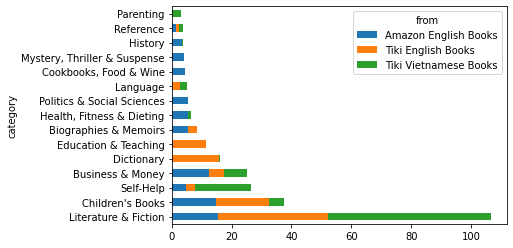

In [13]:
category_count = final.groupby(['category', 'language', 'source']).count()['name']
category_count = category_count.reset_index()
category_count['from'] = category_count['source'] + ' ' +category_count['language']+ ' Books'
tiki_vn = category_count[category_count['from']=='Tiki Vietnamese Books']
tiki_vn.name = round(tiki_vn.name/tiki_vn.name.sum()*100,1)
tiki_en = category_count[category_count['from']=='Tiki English Books']
tiki_en.name = round(tiki_en.name/tiki_en.name.sum()*100,1)
amazon_en = category_count[category_count['from']=='Amazon English Books']
amazon_en.name = round(amazon_en.name/amazon_en.name.sum()*100,1)
category_count= pd.concat([tiki_vn, tiki_en, amazon_en])
category_count.drop(columns=['language', 'source'], inplace=True)
category_count

pivot = category_count.pivot_table(values='name', index = 'category', columns='from').fillna(0)
pivot['sum']= pivot['Amazon English Books']+ pivot['Tiki Vietnamese Books']+pivot['Tiki English Books']
pivot = pivot.sort_values('sum', ascending=False)
pivot.drop('sum', 1, inplace=True)
pivot.head(15).plot.barh(stacked = True,)
pivot.head(15).to_csv('data/category.csv')

4. Price


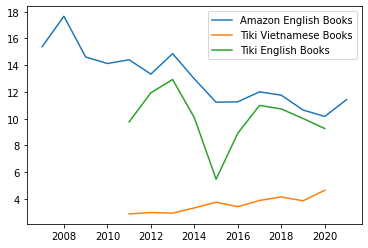

In [14]:
plt.plot(amazon[amazon['year']>2006].groupby('year').price.mean(),label='Amazon English Books')
plt.plot(tiki[tiki['language']=='Vietnamese'].groupby('year').price.mean(), label = "Tiki Vietnamese Books")
plt.plot(tiki[tiki['language']=='English'].groupby('year').price.mean(), label = "Tiki English Books")
plt.legend()
plt.show()
price = final.groupby(['year', 'from']).mean()['price']
price = price.reset_index()
price_pivot = price.pivot_table(values = 'price', index = 'year', columns = 'from' )
price_pivot.to_csv('data/price.csv')

5. Name


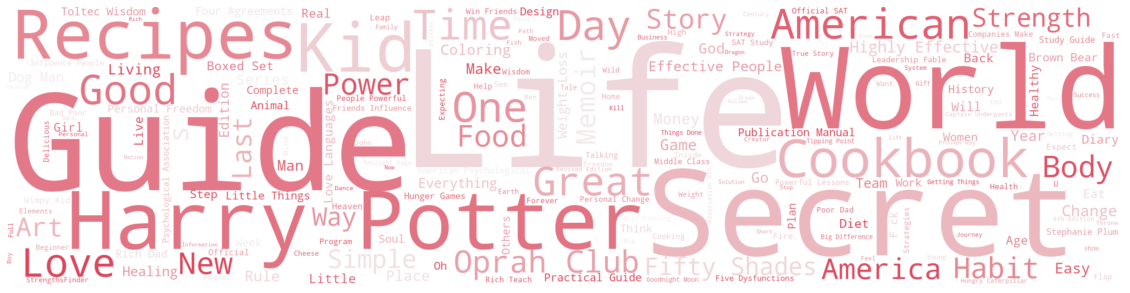

In [98]:
from wordcloud import WordCloud

# Create the wordcloud object
list = ''
for row in amazon['name']:
  list += row if isinstance(row, str) else ''
  list += ' '
list = list.replace('Novel','')
list = list.replace('Book','')
wordcloud = WordCloud(width=2400, height=600, margin=0, background_color="white",colormap=red).generate(list)

# Display the generated image:
plt.figure(figsize= (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
wordcloud.to_file('graph/wc_amazon.png')

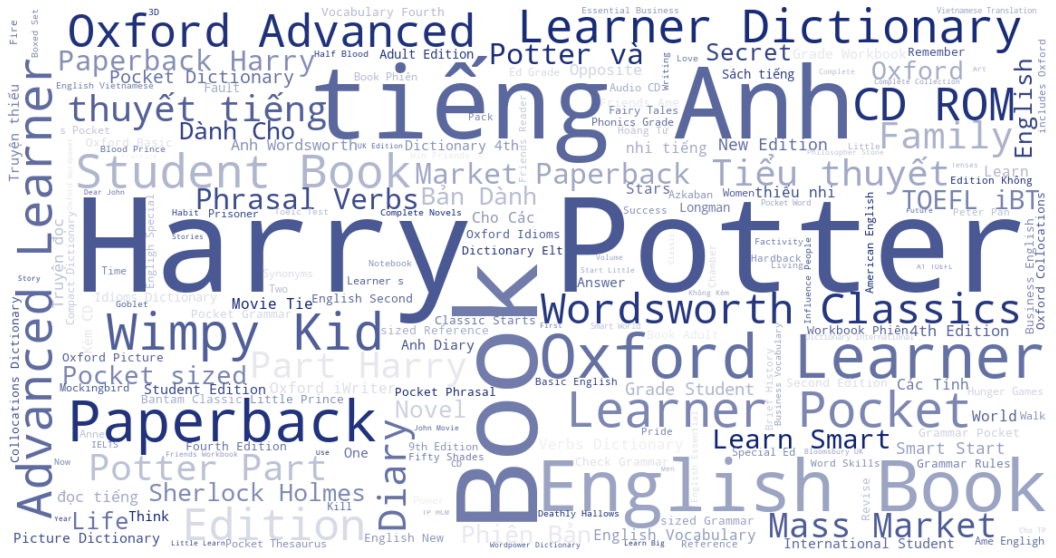

In [103]:
list = ''
for row in tiki[tiki['language']=='English']['name']:
  list += row if isinstance(row, str) else ''
  list += ' '

wordcloud= WordCloud(width=1150, height=600, margin=0, background_color="white",colormap=blue).generate(list)

# Display the generated image:
plt.figure(figsize= (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
wordcloud.to_file('graph/wc_tiki_en.png')

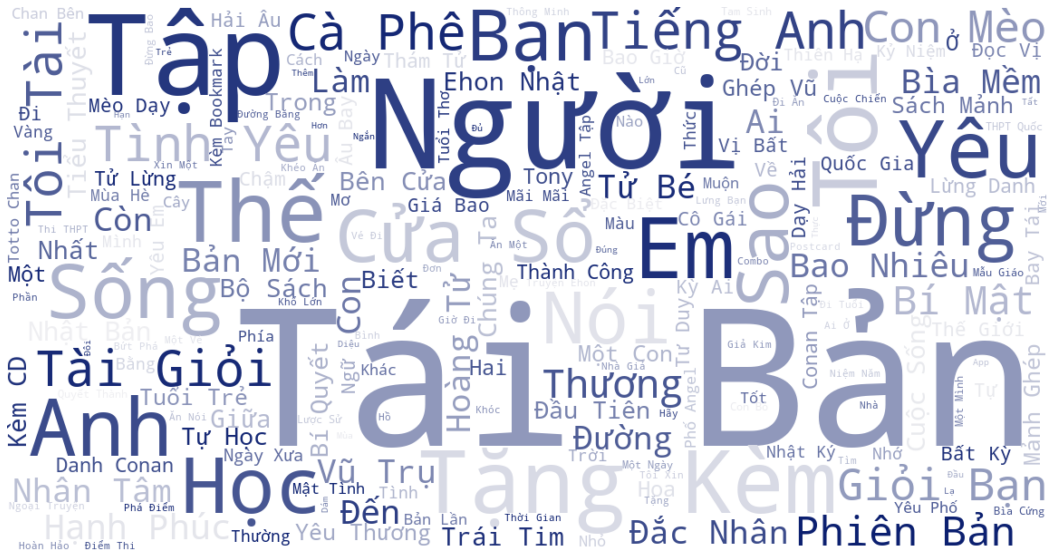

In [107]:
from wordcloud import WordCloud
stopwords = open('stopwords.txt','r',encoding="utf8")
sw = []
for line in stopwords:
  sw.append(line.strip())
list = list.replace('Novel','')
list = ''
for row in tiki[tiki['language']=='Vietnamese']['name']:
  list += row if isinstance(row, str) else ''
  list += ' '

wordcloud = WordCloud(width=1150, height=600, margin=0, background_color="white",colormap=blue, stopwords= sw).generate(list)

# Display the generated image:
plt.figure(figsize= (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
wordcloud.to_file('graph/wc_tiki_Vn.png')

6. Rating Distribution

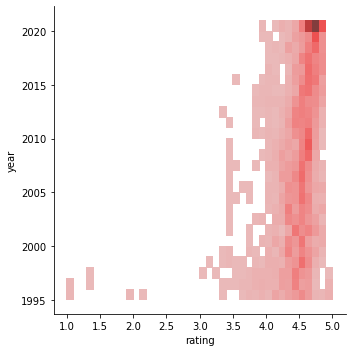

In [105]:
fig = sns.displot(amazon, x = 'rating', y = 'year', binwidth =(0.1,1), color='lightcoral')
fig.savefig('graph/amazon_rating.png', format='png', dpi=1200)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(*args, **kwargs)


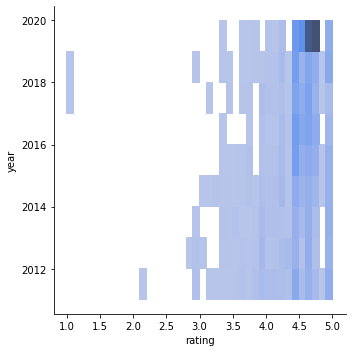

In [16]:
fig = sns.displot(tiki, x = 'rating', y = 'year', binwidth =(0.1,1), color = 'cornflowerblue')
fig.savefig('graph/tiki_rating.png', type = 'png', dpi =1200)